# Getting start in designing the operation and maintenance of shared bike in the city!
## Before you start, run the cell to know the city~
Here we choose xxx city in xxx as our example.

Dataset is from website: 

Millions of thanks for this open-source dataset!
## How to understand the city?
The city is divided into 25*25 grids, containing 625 cells (I)

There are 250 parking stations (J) in the city, capable of accommodate shared bikes.

In one day, time is represented by [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path

from src.data_prep import load_data, describe_data
from src.viz import (
    set_journal_style,
    plot_hourly_heatmap_grid,
    plot_morning_evening_heatmap,
    plot_hourly_demand_bar
)

set_journal_style()

D, Dist, cap, meta, stations = load_data("data/processed")
describe_data(D, Dist, cap, meta)

demand_df = pd.read_csv("data/processed/demand.csv")

Number of demand cells (I): 625
Number of stations (J): 250
Number of time slices (T): 24
Total demand: 101716.0
Average demand per hour: 4238.166666666667
Total base capacity: 10099.0
Time slices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


# See the demands in different time and places!
## 24h demands in the city
Just run the cell, the first figure is what you want~

Want to revise?

You can adjust parameter "clip_q" to change the colorbar.

Parameter "clip_q" is in the range of [0,100].

Higher the "clip_q", the wider the range of colorbar.

Move on and see the difference!

## Demands of specific time in the city
Just run the cell, the second figure is what you want~

Want to see different time?

Change the parameters "morning_h" and "evening_h=18", you can get the heatmap under these two times!

Also, you can change the parameter "clip_q"!

Move on and see the comparison!

## Demands change in a day
Just run the cell, the third figure is what you want~

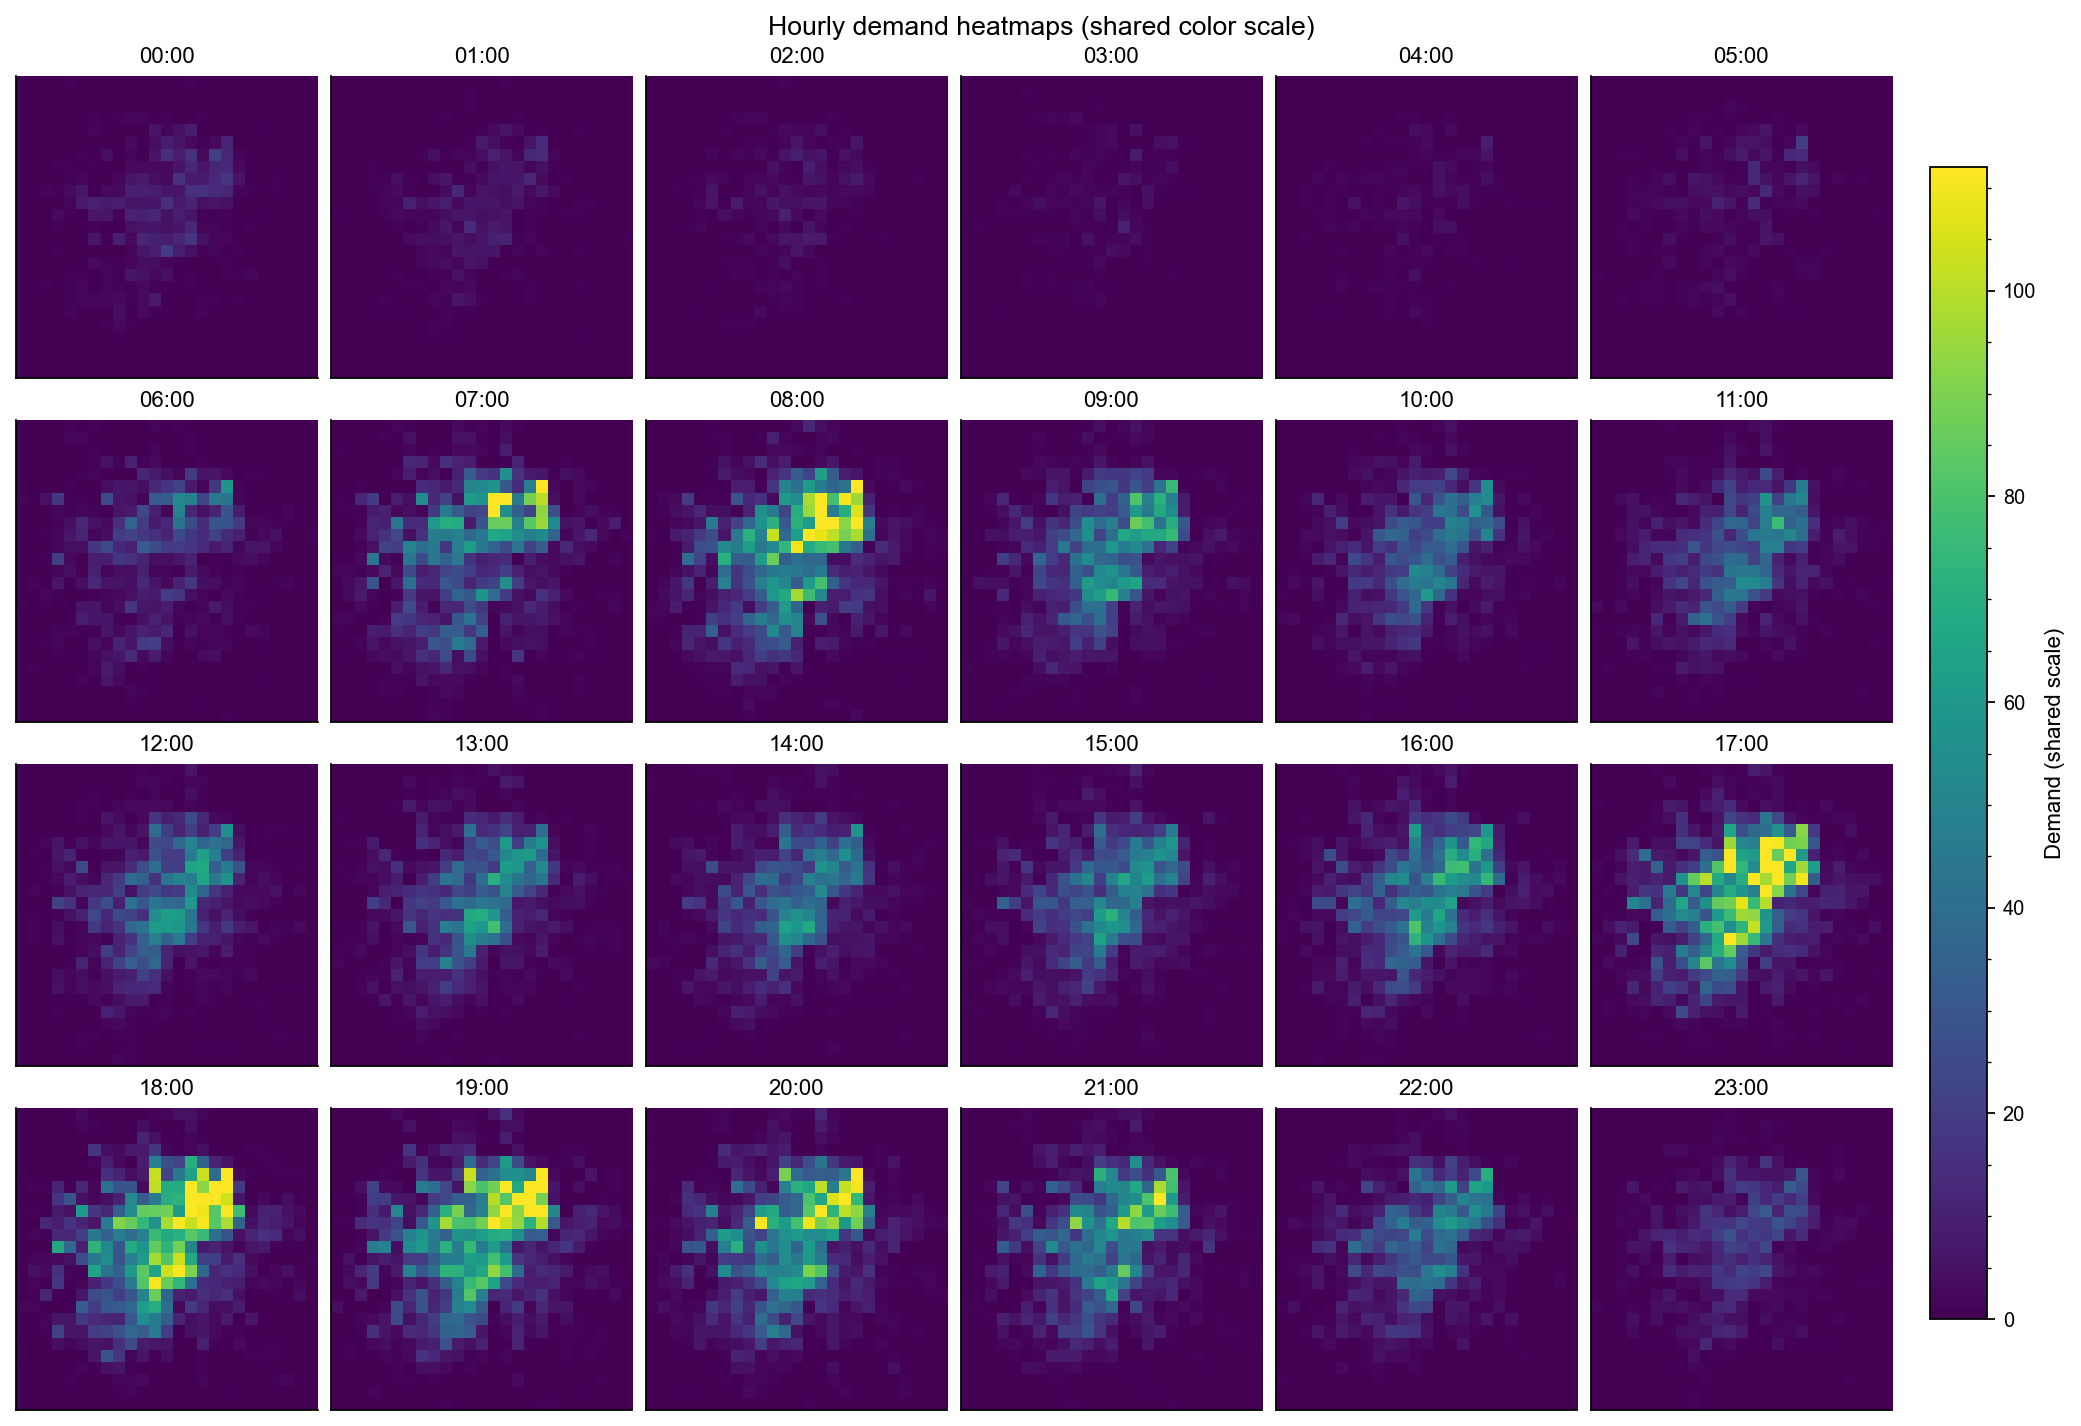

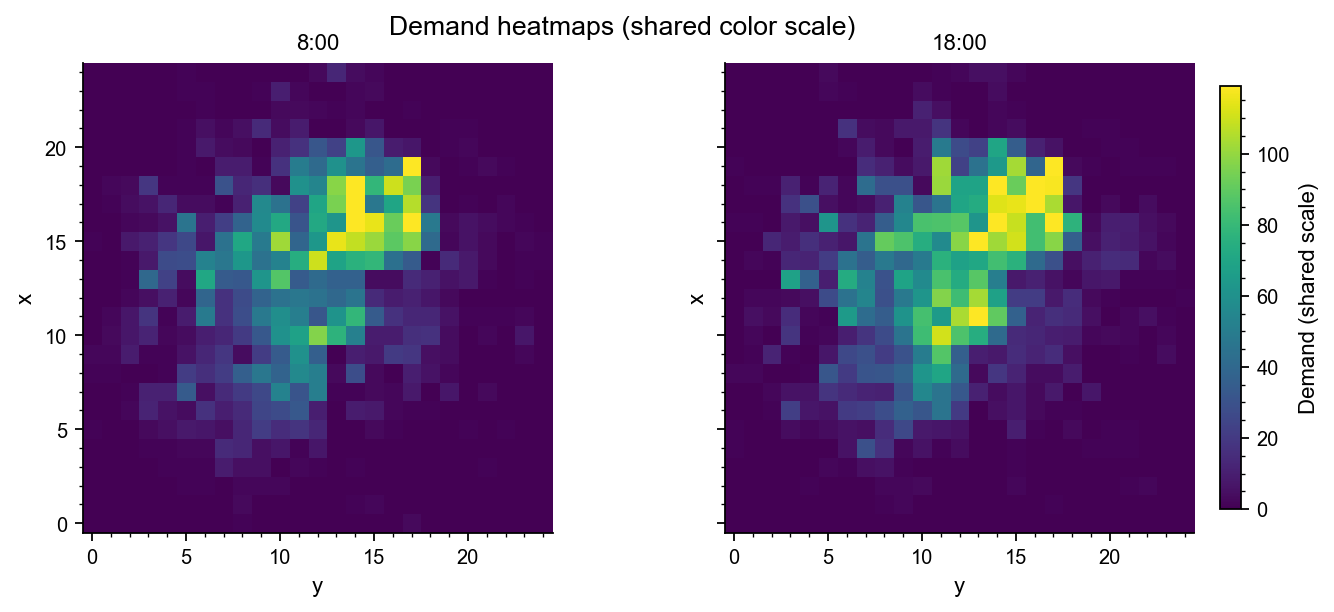

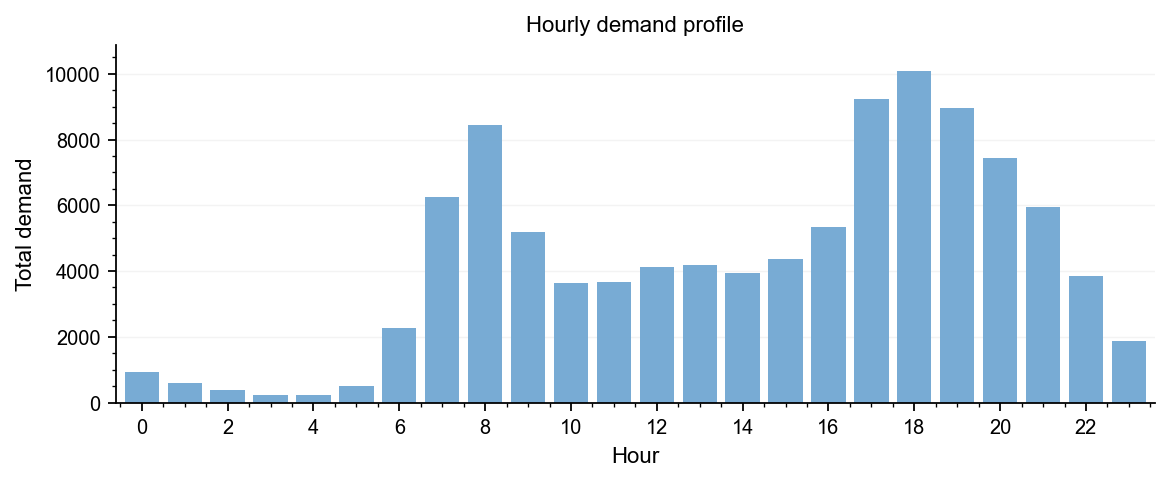

In [2]:
plot_hourly_heatmap_grid(
    demand_df=demand_df,
    grid_n=None,
    hours=list(range(24)),
    ncols=6,
    clip_q=99.7,  
)

plot_morning_evening_heatmap(
    demand_csv_path="data/processed/demand.csv",
    grid_n=None,
    morning_h=8,
    evening_h=18,
    clip_q=99,
)

hourly_total = demand_df.groupby("t")["demand"].sum().reindex(range(24), fill_value=0)
plot_hourly_demand_bar(hourly_total, title="Hourly demand profile")


# See the distribution of parking site in the city!
## Run the cell is all you need!

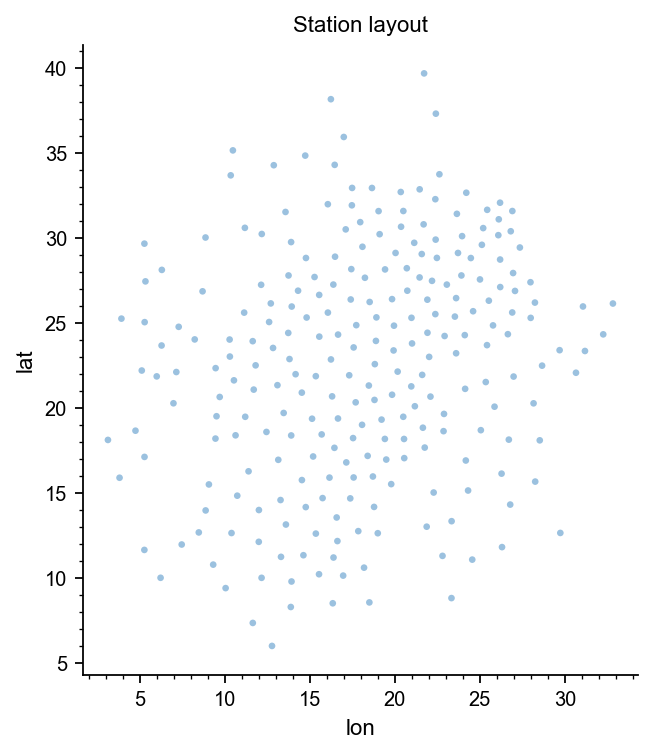

In [3]:
from src.viz import plot_station_layout

plot_station_layout(stations_df=stations, y=None)
